In [1]:
#import package
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt
import time

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras import regularizers
from keras import optimizers

%matplotlib inline

print('Done')

Using TensorFlow backend.


Done


In [2]:
def readData():
    data = pd.read_csv('C:/Users/yoon/Python/Stock_Prediction/sensex_DIV.csv', parse_dates = [0])
    raw_dates = data.loc[30:, 'date'].reset_index(drop=True)
    del data['date']
    raw_data = data.loc[30:].reset_index(drop=True)
    return raw_data, raw_dates

def split_into_chunks(data, train, predict, step):
    train_set, label_set = [], []
    for i in range(0, len(data), step):
        try:
            temp_train = data.loc[i:i+train-1, 'dSMA':'dCCI'].as_matrix()
            temp_label = data.loc[i+train-1+predict, 'return']
            if temp_label >= 0:
                temp_label = [1.0, 0.0]
            elif temp_label < 0:
                temp_label = [0.0, 1.0]
        except:
            break
        train_set.append(temp_train)
        label_set.append(temp_label)
    return train_set, label_set

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

def create_Xt_Yt(X, y, percentage=0.5):
    X_train = X[0:int(len(X) * percentage)]
    Y_train = y[0:int(len(y) * percentage)]
    X_train, Y_train = shuffle_in_unison(X_train, Y_train)
    X_test = X[int(len(X) * percentage):]
    Y_test = y[int(len(X) * percentage):]
    return X_train, X_test, Y_train, Y_test

print('Done')

Done


In [3]:
timeSeriesList, dates = readData()
DATA_SIZE_ON_TRAIN = 1
TARGET_TIME = 1
STEP_SIZE = 1

print('Done')

Done


In [8]:
X, Y = split_into_chunks(timeSeriesList, DATA_SIZE_ON_TRAIN, TARGET_TIME, STEP_SIZE)
X, Y = np.array(X), np.array(Y)
X = X.reshape(-1, DATA_SIZE_ON_TRAIN * 10)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.5)
print('Done')

Done


In [5]:
model = Sequential()
model.add(Dense(200, input_dim = DATA_SIZE_ON_TRAIN * 10, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(50, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(2))
model.add(Activation('softmax'))

opt = optimizers.Nadam(lr=0.001)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training...")
model.fit(X_train, 
            Y_train, 
            epochs=100,
            batch_size = 128,
            verbose=1)

print("Evaluating...")
score = model.evaluate(X_test, Y_test, batch_size=128)
print("\nTest loss and accuracy:" + str(score))

Training...
Epoch 1/100
1300/1300 [==============================] - 4s - loss: 109.3006 - acc: 0.5308     
Epoch 2/100
1300/1300 [==============================] - 0s - loss: 82.7267 - acc: 0.5269     
Epoch 3/100
1300/1300 [==============================] - 0s - loss: 68.3802 - acc: 0.5146      ETA: 0s - loss: 70.7136 - acc: 0.
Epoch 4/100
1300/1300 [==============================] - 0s - loss: 59.4618 - acc: 0.5331     
Epoch 5/100
1300/1300 [==============================] - 0s - loss: 51.3633 - acc: 0.5423     
Epoch 6/100
1300/1300 [==============================] - 0s - loss: 45.4982 - acc: 0.5615      ETA: 0s - loss: 46.8605 - acc: 0.
Epoch 7/100
1300/1300 [==============================] - 0s - loss: 39.9681 - acc: 0.5408     
Epoch 8/100
1300/1300 [==============================] - 0s - loss: 35.5614 - acc: 0.5377     
Epoch 9/100
1300/1300 [==============================] - 0s - loss: 31.2428 - acc: 0.5331     
Epoch 10/100
1300/1300 [==============================] - 0s - l

1300/1300 [==============================] - 0s - loss: 0.7834 - acc: 0.5954     
Epoch 86/100
1300/1300 [==============================] - 0s - loss: 0.7797 - acc: 0.6031     
Epoch 87/100
1300/1300 [==============================] - 0s - loss: 0.7761 - acc: 0.6008     
Epoch 88/100
1300/1300 [==============================] - 0s - loss: 0.7772 - acc: 0.5985     
Epoch 89/100
1300/1300 [==============================] - 0s - loss: 0.7662 - acc: 0.6023     
Epoch 90/100
1300/1300 [==============================] - 0s - loss: 0.7654 - acc: 0.5954     
Epoch 91/100
1300/1300 [==============================] - 0s - loss: 0.7659 - acc: 0.5946     
Epoch 92/100
1300/1300 [==============================] - 0s - loss: 0.7594 - acc: 0.5992     
Epoch 93/100
1300/1300 [==============================] - 0s - loss: 0.7586 - acc: 0.6038     
Epoch 94/100
1300/1300 [==============================] - 0s - loss: 0.7565 - acc: 0.5985     
Epoch 95/100
1300/1300 [==============================] - 0s - 

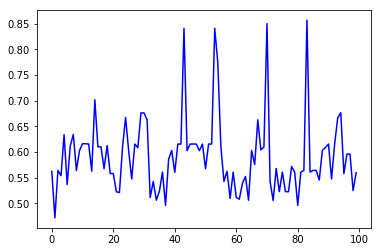

In [24]:
predicted = model.predict(X_test)
plt.plot(predicted[:100, 0], color='blue') # RED - trained PREDICTION
#plt.plot(Y_test[:100, 1], color='red')